In [212]:
import sklearn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error
import random

train_percent = 0.4
test_percent= 0.6
valid_percent = 0.1

data = np.loadtxt('data.csv', unpack=True, delimiter=',',skiprows=0 )
data = np.transpose(data)

random.shuffle(data)

In [213]:


train_set = data[0:int(len(data)*train_percent)]
train_set = sorted(train_set, key=lambda train_set: train_set[0]) # Sorting again for data in order
print(len(train_set))
train_set = np.transpose(train_set)

test_set = data[int(len(data)*train_percent):2000]
test_set = sorted(test_set, key=lambda test_set: test_set[0]) # Sorting again for data in order
print(len(test_set))
test_set = np.transpose(test_set)

train_set = np.transpose(train_set) #valid data를 읽어오기 위해 재전치 

valid_set = data[0:int(len(train_set)*valid_percent)]
valid_set = sorted(valid_set, key=lambda valid_set: valid_set[0]) # Sorting again for data in order
print(len(valid_set))
valid_set = np.transpose(valid_set)

train_set = np.transpose(train_set) #원래값으로 재재전치

train_x = train_set[0]  
train_y = train_set[1]

test_x = test_set[0]  
test_y = test_set[1]


valid_x = valid_set[0]
valid_y = valid_set[1]



800
1200
80


In [214]:
def fit_polynomial(x,y , degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

In [215]:
Optimal_Order = 0
Minimum_MSE = 9999
Optimal_Model=None

for polynomial_order in range(0, 10) :

   # Write codes measuring MSE for valid set
   # For calculating MSE use the library "mean_squared_error" in "sklearn.metrics"
    model = fit_polynomial(train_x, train_y, polynomial_order)
    Estimated_train_y = apply_polynomial(model, train_x)
    
    model_valid=fit_polynomial(valid_x, valid_y, polynomial_order)
    Estimated_valid_y=apply_polynomial(model_valid, valid_x)
    
   
    MSE=mean_squared_error(valid_y, Estimated_valid_y)

    if Minimum_MSE> MSE :
        Optimal_Order = polynomial_order
        Minimum_MSE = MSE
        Optimal_Model = model
        
print("----------------------","\n")
print("We can choose best polynomial order with MSE of validation set.")
print("Optimal order is ", Optimal_Order)
print("Minimum MSE is ", Minimum_MSE)
print("\n")
print("-----TEST RESULT-----")


---------------------- 

We can choose best polynomial order with MSE of validation set.
Optimal order is  9
Minimum MSE is  0.740810370191501


-----TEST RESULT-----


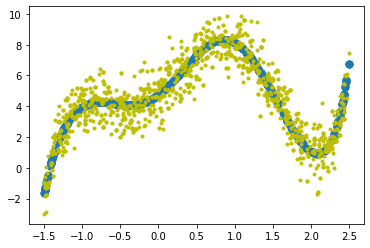

In [216]:
#Overlay ( Regression polynomial along training feature data ) and test data set (test_x, test,y)

plt.plot(train_x, apply_polynomial(Optimal_Model, train_x),'o', markersize=7)   
plt.plot(test_x, test_y, 'y.') 

MSE :  0.9352582386076157
The coefficient of model is  [ 0.0606465  -0.23737025 -0.20150968  1.46564755  0.91026287 -4.95047023
 -2.42339131  5.00310249  3.7395489   0.        ] ,   4.75490748496498


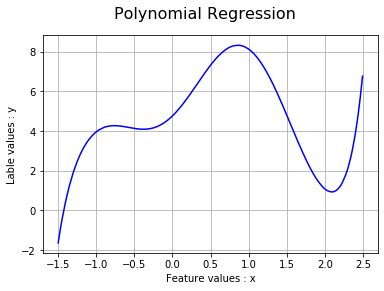

In [217]:
Estimated_test_y =  apply_polynomial(Optimal_Model, test_x)
MSE_Performances = mean_squared_error(test_y, Estimated_test_y)

print("MSE : ", MSE_Performances)

print("The coefficient of model is ",Optimal_Model.coef_,",  ",Optimal_Model.intercept_)

plt.plot(train_x, apply_polynomial(Optimal_Model, train_x), 'b', markersize=1)
plt.xlabel('Feature values : x')
plt.ylabel('Lable values : y')
plt.grid()
plt.suptitle('Polynomial Regression',fontsize=16)


plt.show()